In [1]:
from __future__ import division, print_function
!ls
!pwd

Nanog scores analysis.ipynb           meme_results.txt.gz
all_negatives.fa                      motifResults
all_positives.fa                      nrkmers.fa
compute_auroc.py                      nrkmers_scores.txt
gandhietalpwms_models.meme            positive_set_full.bed
gen_dinuc_balanced.sh                 positives_test.fa
gen_dinucleotide_freqs.py             preds_test_negatives.txt
gkmexplain_positives_hypimpscores.txt preds_test_positives.txt
gkmexplain_positives_impscores.txt    prep_data_and_train_model.sh
gkmsvm                                run_gkmexplain.sh
gkmsvm-2.0.tar.gz                     run_homer.sh
lsgkm_defaultsettings_t2.model.txt
/Users/avantishrikumar/Research/gkmexplain/train_lsgkm_on_encode/H1ESC/Nanog/tryagain


In [2]:
import numpy as np
def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1
            
#read in the fasta files and one-hot encode
fasta_seqs = [x.rstrip() for (i,x) in enumerate(open("positives_test.fa"))
              if i%2==1]
#filter out any sequences that contain 'N's
onehot_data = [np.array(one_hot_encode_along_channel_axis(x))
                         for x in fasta_seqs if ('N' not in x)]
print(len(onehot_data))

960


In [3]:
import gzip
import numpy as np

#filter out any sequences that contain 'N's
hyp_impscores = [w[0] for w in zip([
    np.array( [[float(z) for z in y.split(",")] for y in x.rstrip().split("\t")[2].split(";")])
    for x in open("gkmexplain_positives_hypimpscores.txt")
],fasta_seqs) if 'N' not in w[1]]

impscores = [w[0] for w in zip([
    np.array( [[float(z) for z in y.split(",")] for y in x.rstrip().split("\t")[2].split(";")])
    for x in open("gkmexplain_positives_impscores.txt")
],fasta_seqs) if 'N' not in w[1]]

In [4]:
#sanity check
print(np.max([np.max(np.abs(z*y - x)) for x,y,z in zip(impscores,onehot_data,hyp_impscores)]))

0.0


Couldn't import dot_parser, loading of dot files will not be possible.
1.9667603607


TF-MoDISco is using the TensorFlow backend.


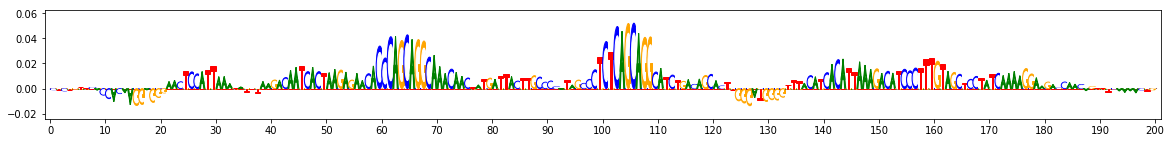

1.150357368134


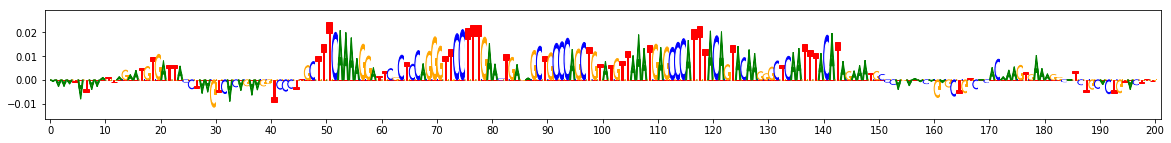

0.9510791799


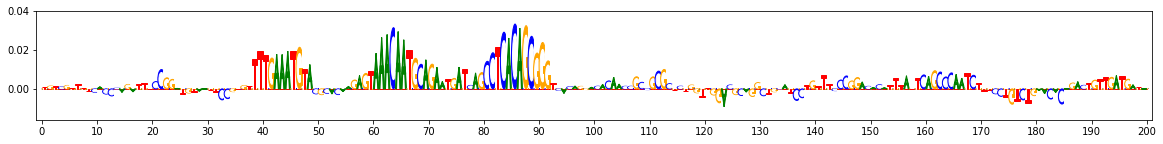

0.7983162303


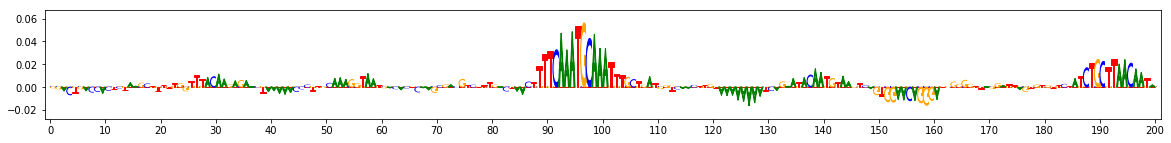

0.6428976399999999


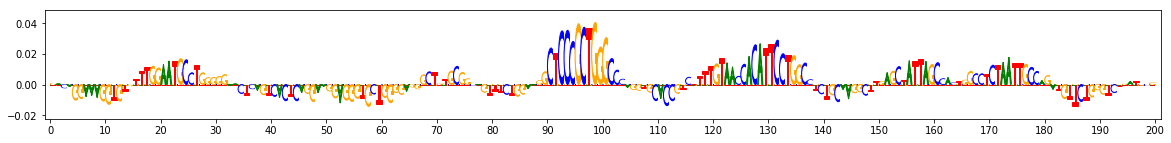

0.5281180124


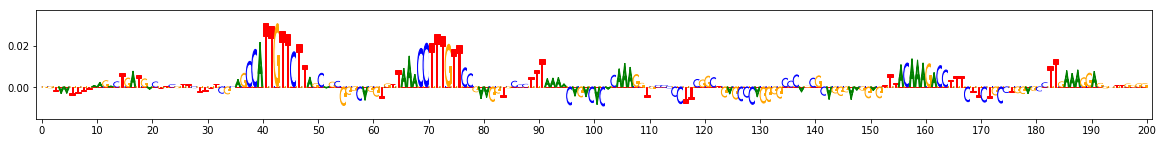

0.3870451210000001


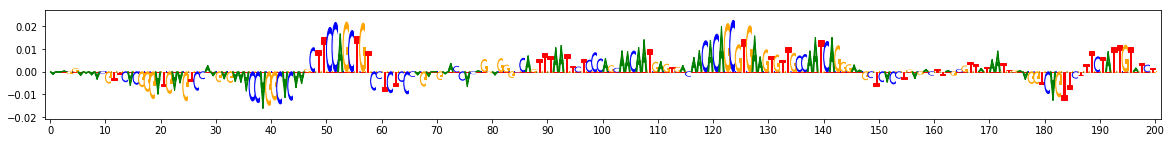

0.22404858699999997


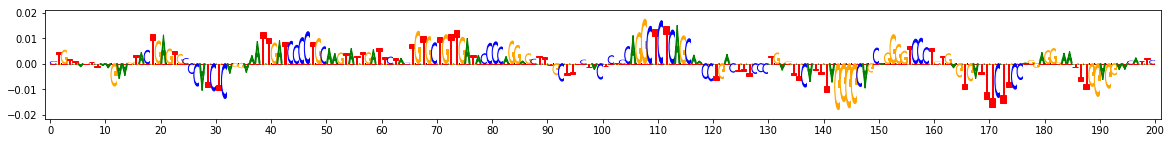

0.028276778999999974


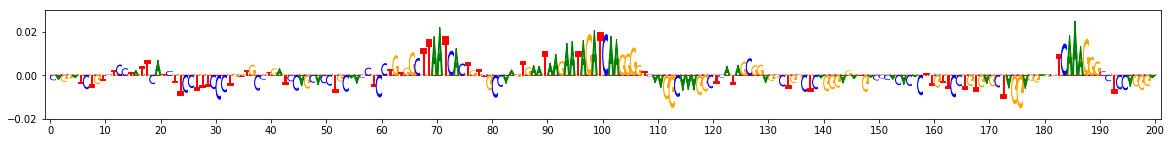

-0.21773746509999997


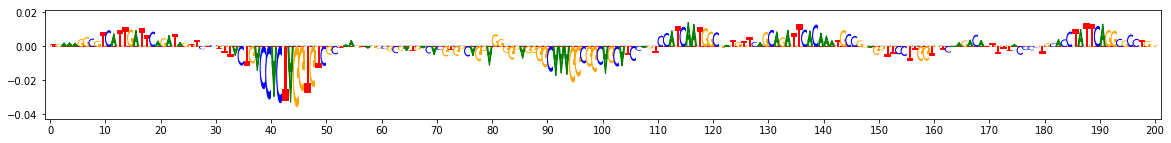

In [5]:
import modisco
from modisco.visualization import viz_sequence
%matplotlib inline

sorted_indices = [x[0] for x in sorted(enumerate([np.sum(x) for x in impscores]), key=lambda x: -x[1])]
for idx in sorted_indices[::int(len(sorted_indices)/10)]:
    print(np.sum(impscores[idx]))
    viz_sequence.plot_weights(impscores[idx], subticks_frequency=10)

On task task0
Computing windowed sums on original
Generating null dist
peak(mu)= -0.002086674729818316
Computing threshold
Thresholds from null dist were -0.4515611533757189  and  0.6135495200351258
Passing windows frac was 5.208333333333334e-05 , which is below  0.1 ; adjusting
Final raw thresholds are -0.15606120093145037  and  0.15606120093145037
Final transformed thresholds are -0.9  and  0.9


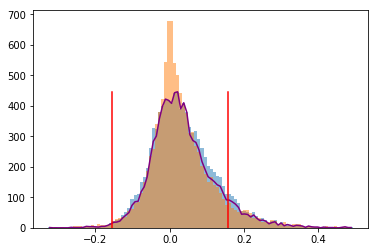

Got 1118 coords
After resolving overlaps, got 1118 seqlets
Across all tasks, the weakest transformed threshold used was: 0.8999999000000001
1118 identified in total
2 activity patterns with support >= 100 out of 3 possible patterns
Metacluster sizes:  [1006, 112]
Idx to activities:  {0: '1', 1: '-1'}
On metacluster 1
Metacluster size 112
Relevant tasks:  ('task0',)
Relevant signs:  (-1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 112
(Round 1) Computing coarse affmat
Beginning embedding computation
Computing embeddings
Finished embedding computation in 1.18 s
Starting affinity matrix computations
Normalization computed in 0.0 s
Cosine similarity mat computed in 0.01 s
Normalization computed in 0.0 s
Cosine similarity mat computed in 0.0 s
Finished affinity matrix computations in 0.01 s
(Round 1) Compute nearest neighbors from coarse affmat
Computed nearest neighbors in 0.0 s
(Round 1) Computing affinity matrix on nearest neighbors
Launching nearest neighbors af

Using TensorFlow backend.


Job completed in: 0.81 s
Launching nearest neighbors affmat calculation job
Job completed in: 0.94 s
(Round 1) Computed affinity matrix on nearest neighbors in 1.83 s
Filtered down to 111 of 112
(Round 1) Retained 111 rows out of 112 after filtering
(Round 1) Computing density adapted affmat
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 111 samples in 0.000s...
[t-SNE] Computed neighbors for 111 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 111 / 111
[t-SNE] Mean sigma: 0.298178
(Round 1) Computing clustering
Beginning preprocessing + Louvain
Wrote graph to binary file in 0.00830006599426 seconds
Running Louvain modularity optimization
Louvain completed 200 runs in 2.28693604469 seconds
Wrote graph to binary file in 0.00722789764404 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.642307
Louvain completed 51 runs in 0.844650030136 seconds
Preproc + Louvain took 3.20638608932 s
Got 6 clusters after round 1

[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.1s finished


Job completed in: 0.71 s
Launching nearest neighbors affmat calculation job
Job completed in: 0.73 s
(Round 2) Computed affinity matrix on nearest neighbors in 1.5 s
Not applying filtering for rounds above first round
(Round 2) Computing density adapted affmat
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 77 samples in 0.000s...
[t-SNE] Computed neighbors for 77 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 77 / 77
[t-SNE] Mean sigma: 0.309397
(Round 2) Computing clustering
Beginning preprocessing + Louvain
Wrote graph to binary file in 0.00626993179321 seconds
Running Louvain modularity optimization
Louvain completed 200 runs in 2.15049099922 seconds
Wrote graph to binary file in 0.00522589683533 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.573419
After 35 runs, maximum modularity is Q = 0.582153
Louvain completed 85 runs in 1.4100549221 seconds
Preproc + Louvain took 3.6083240509 s
Got 6 clusters af

[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.0s finished


Computing pattern to pattern distances
Got 6 patterns after merging
Performing seqlet reassignment
Got 0 patterns after reassignment
Total time taken is 13.73s
On metacluster 0
Metacluster size 1006
Relevant tasks:  ('task0',)
Relevant signs:  (1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 1006
(Round 1) Computing coarse affmat
Beginning embedding computation
Computing embeddings
Finished embedding computation in 1.36 s
Starting affinity matrix computations
Normalization computed in 0.05 s
Cosine similarity mat computed in 0.21 s
Normalization computed in 0.05 s
Cosine similarity mat computed in 0.14 s
Finished affinity matrix computations in 0.36 s
(Round 1) Compute nearest neighbors from coarse affmat
Computed nearest neighbors in 0.07 s
(Round 1) Computing affinity matrix on nearest neighbors
Launching nearest neighbors affmat calculation job
Job completed in: 28.51 s
Launching nearest neighbors affmat calculation job
Job completed in: 28.72 s
(Round 1) Com

[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    3.8s finished


Louvain completed 200 runs in 4.58787202835 seconds
Wrote graph to binary file in 0.357803106308 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.649576
After 6 runs, maximum modularity is Q = 0.65451
After 15 runs, maximum modularity is Q = 0.656996
After 22 runs, maximum modularity is Q = 0.658471
After 25 runs, maximum modularity is Q = 0.66296
Louvain completed 75 runs in 2.76638293266 seconds
Preproc + Louvain took 7.86323881149 s
Got 6 clusters after round 1
Counts:
{0: 291, 1: 270, 2: 225, 3: 108, 4: 38, 5: 25}
(Round 1) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 291 seqlets
Trimmed 27 out of 291
Skipped 47 seqlets
Aggregating for cluster 1 with 270 seqlets
Trimmed 13 out of 270
Skipped 32 seqlets
Aggregating for cluster 2 with 225 seqlets
Trimmed 12 out of 225
Skipped 34 seqlets
Aggregating for cluster 3 with 108 seqlets
Trimmed 3 out of 108
Skipped 18 seqlets
Aggregating for cluster 4 with 38 seqlets
Trimmed 3 ou

[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    3.1s finished


Louvain completed 200 runs in 3.7791531086 seconds
Wrote graph to binary file in 0.279892921448 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.623416
After 7 runs, maximum modularity is Q = 0.628853
After 45 runs, maximum modularity is Q = 0.628881
Louvain completed 95 runs in 3.03875303268 seconds
Preproc + Louvain took 7.24035310745 s
Got 7 clusters after round 2
Counts:
{0: 217, 1: 216, 2: 167, 3: 118, 4: 22, 5: 13, 6: 4}
(Round 2) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 217 seqlets
Trimmed 19 out of 217
Aggregating for cluster 1 with 216 seqlets
Trimmed 56 out of 216
Aggregating for cluster 2 with 167 seqlets
Trimmed 11 out of 167
Aggregating for cluster 3 with 118 seqlets
Trimmed 24 out of 118
Skipped 3 seqlets
Aggregating for cluster 4 with 22 seqlets
Trimmed 5 out of 22
Skipped 1 seqlets
Aggregating for cluster 5 with 13 seqlets
Trimmed 0 out of 13
Skipped 1 seqlets
Aggregating for cluster 6 with 4 seqlets
Tri

In [6]:
%matplotlib inline
import modisco
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)

#normalize the hyp scores such that, at each position, hypothetical importance
# scores that have the same sign as the original importance score all sum
# up to the original importance score value. The rationale is that if
# multiple different bases at a position could produce a similar score,
# the specific identity of each individual base is less important.
#Empirically, hypothetical scores like these appear to work better for
# motif discovery. Using normalized importance scores derived by taking
# the elementwise product of the normalized hypothetical scores and
# the one-hot encoding also seems to reduce noise.
normed_hyp_scores = []
normed_impscores = []
for i in range(len(impscores)):
    imp_score_each_pos = np.sum(impscores[i],axis=-1)
    imp_score_sign_each_pos = np.sign(imp_score_each_pos)
    hyp_scores_same_sign_mask = (np.sign(hyp_impscores[i])*imp_score_sign_each_pos[:,None] > 0)
    hyp_scores_same_sign_imp_scores_sum = np.sum(hyp_impscores[i]*hyp_scores_same_sign_mask,axis=-1)
    norm_ratio = imp_score_each_pos/hyp_scores_same_sign_imp_scores_sum
    norm_hyp = hyp_impscores[i]*norm_ratio[:,None]
    normed_hyp_scores.append(norm_hyp)
    normed_impscores.append(norm_hyp*onehot_data[i])
    
tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
                        min_passing_windows_frac=0.1, #take the top 10% of sliding windows
                        seqlets_to_patterns_factory=
                            modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
                                #Adjust trim_to_window_size and initial_flank_to_add
                                # according to how big you expect
                                # the core motif to be; default value is 10
                                #trim_to_window_size=6,
                                #initial_flank_to_add=2,
                                #final_flank_to_add=5,
                                #kmer_len, num_gaps and num_mismatches are used to
                                # derive kmer embeddings for coarse-grained affinity
                                # matrix calculation. kmer_len=6, num_gaps=1
                                # and num_mismatches=0 means
                                # that kmer embeddings using 6-mers with 1 gap will be
                                # used.
                                kmer_len=6, num_gaps=1,
                                num_mismatches=0,
                        ),
                   )(
                task_names=["task0"],
                contrib_scores={'task0': normed_impscores},                
                hypothetical_contribs={'task0': normed_hyp_scores},
                one_hot=onehot_data)

num seqlets 201
fwd


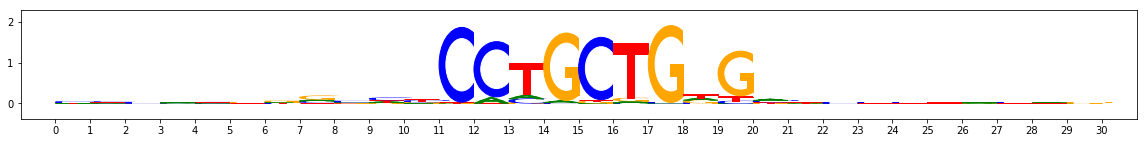

Contrib scores


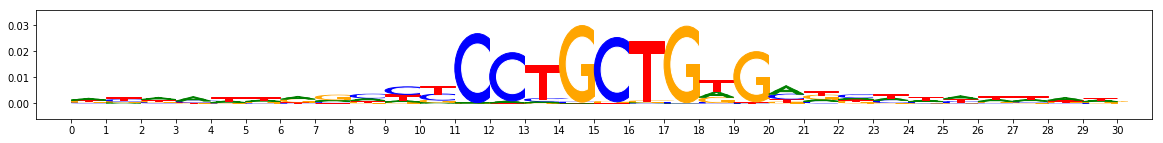

Hyp contrib scores


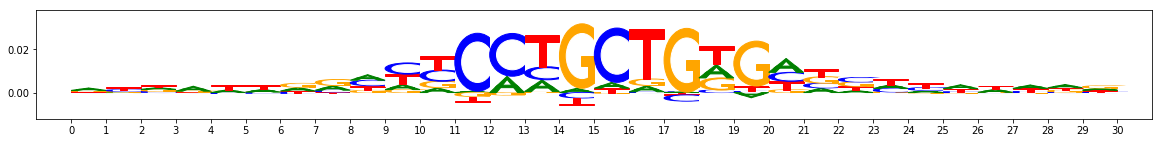

rev


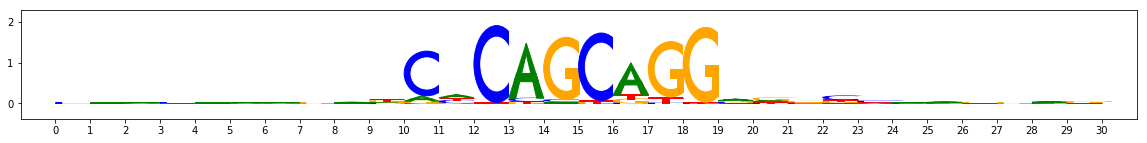

Contrib scores


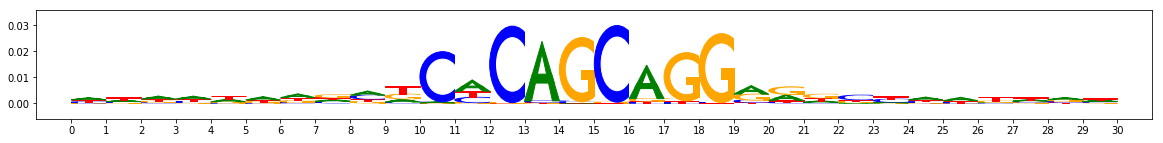

Hyp contrib scores


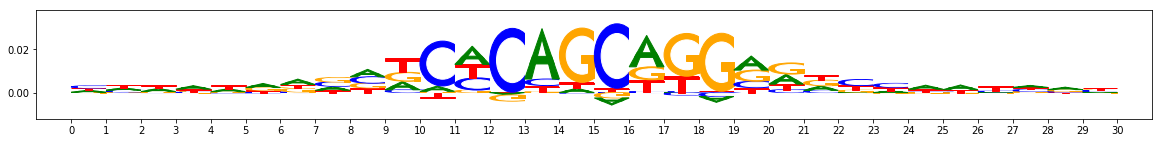

num seqlets 146
fwd


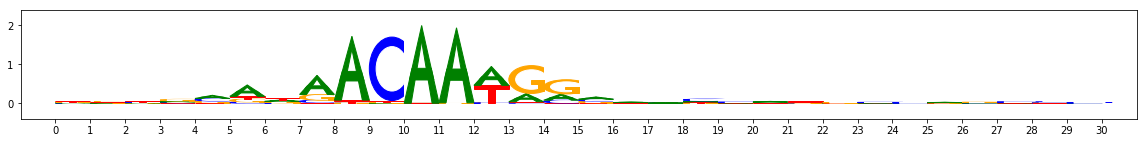

Contrib scores


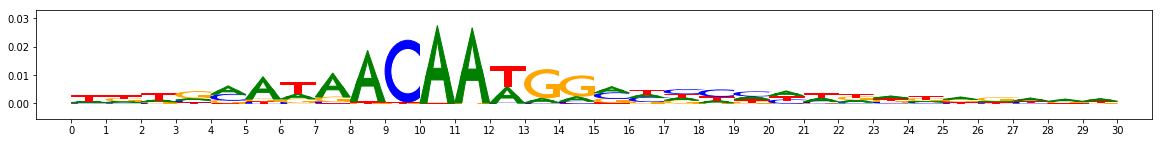

Hyp contrib scores


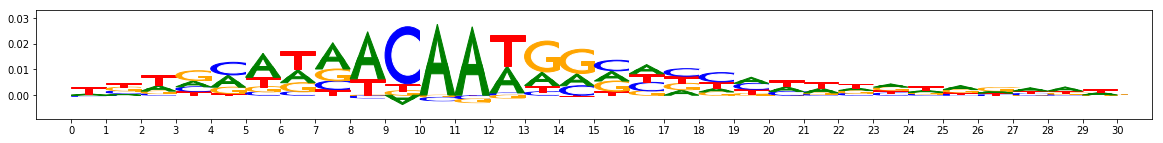

rev


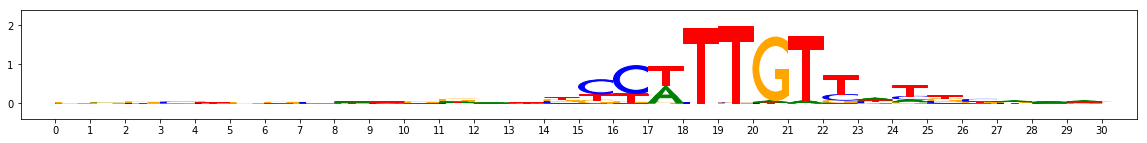

Contrib scores


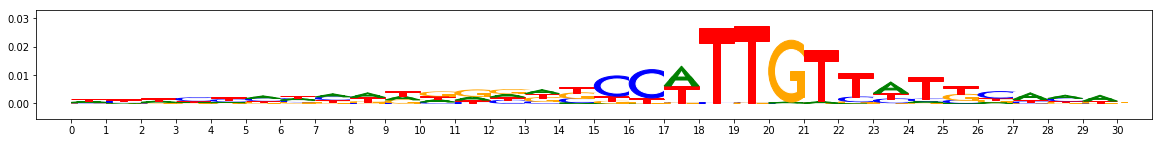

Hyp contrib scores


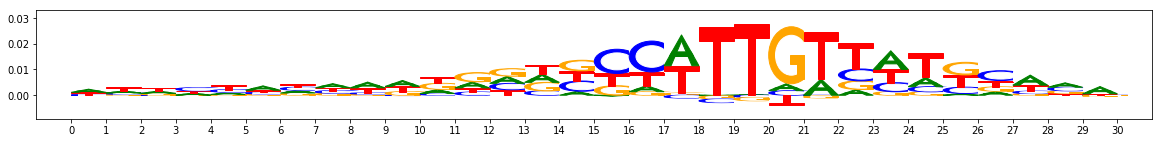

num seqlets 109
fwd


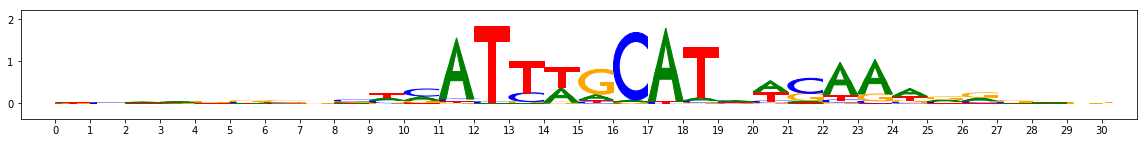

Contrib scores


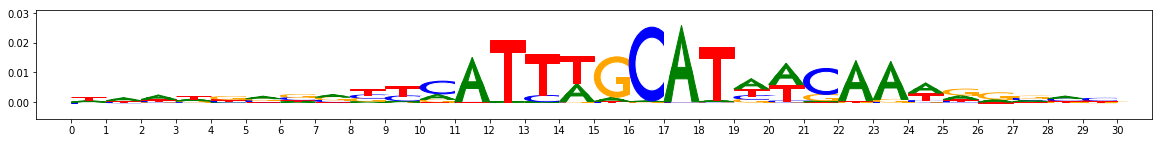

Hyp contrib scores


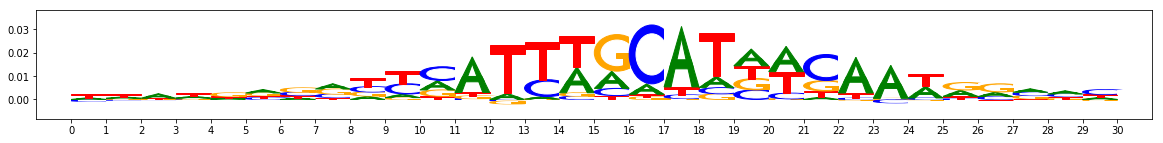

rev


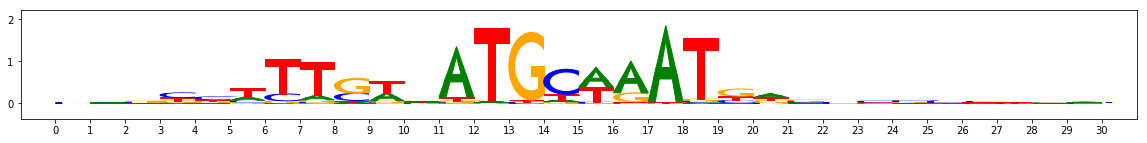

Contrib scores


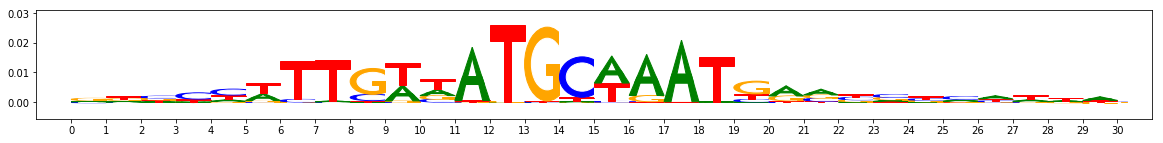

Hyp contrib scores


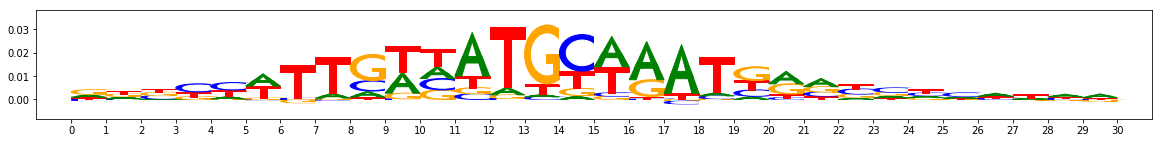

num seqlets 69
fwd


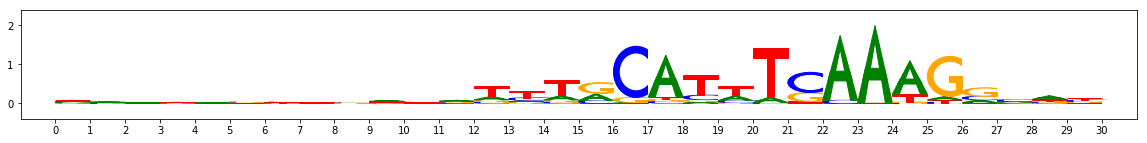

Contrib scores


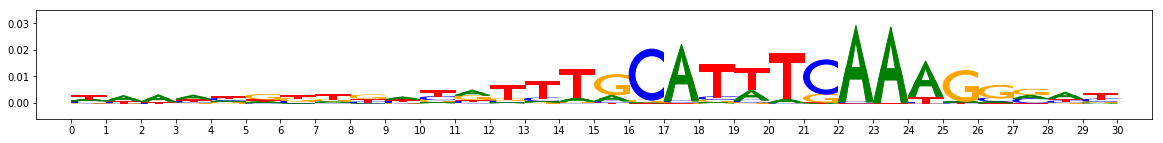

Hyp contrib scores


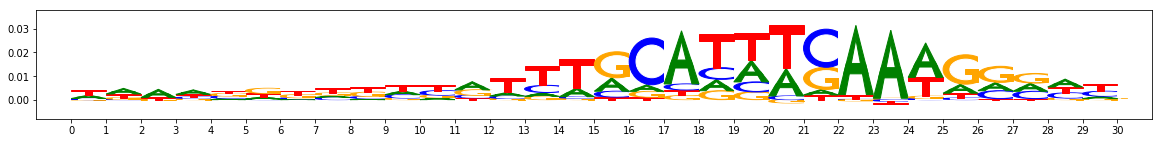

rev


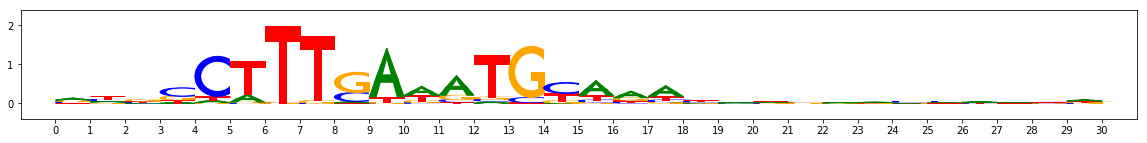

Contrib scores


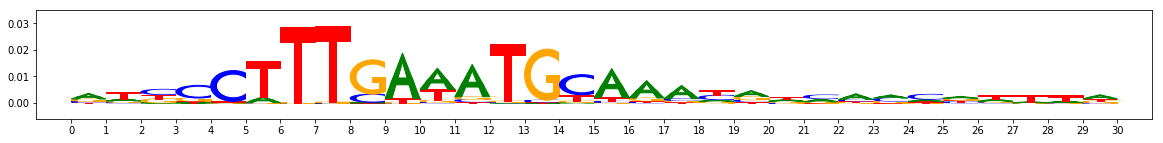

Hyp contrib scores


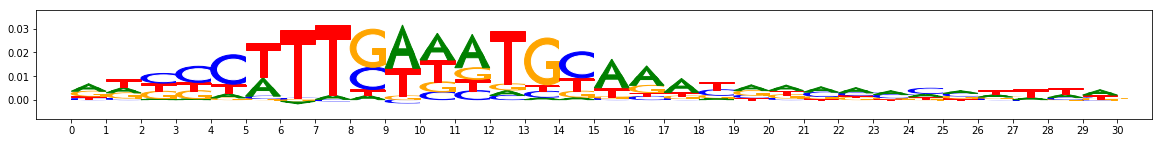

num seqlets 54
fwd


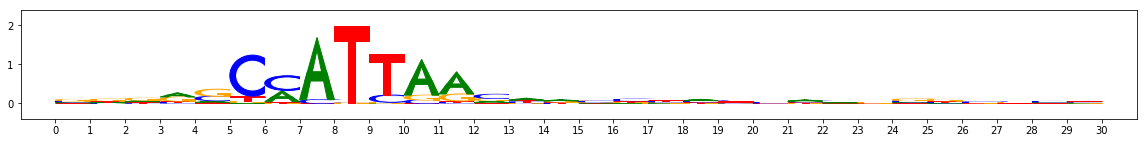

Contrib scores


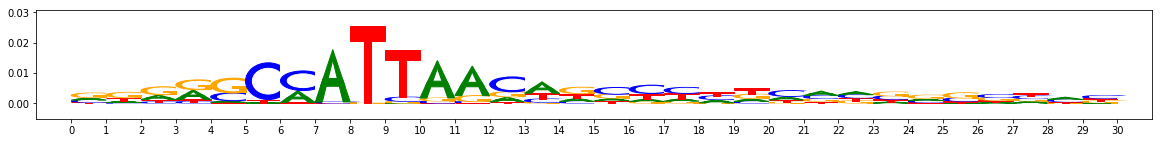

Hyp contrib scores


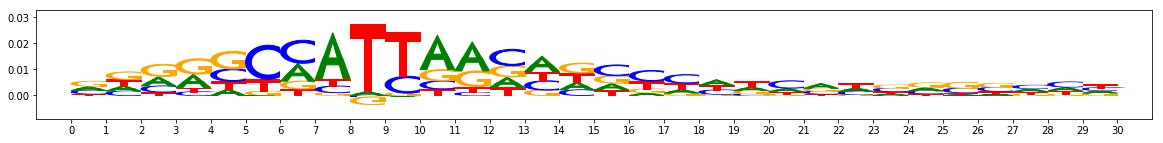

rev


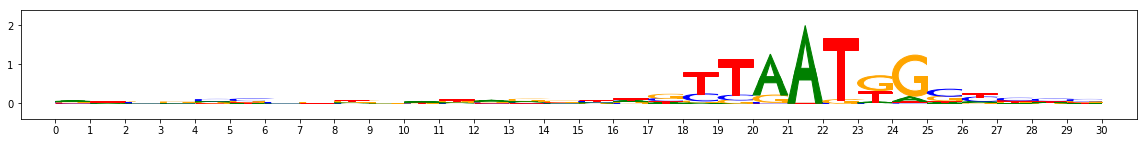

Contrib scores


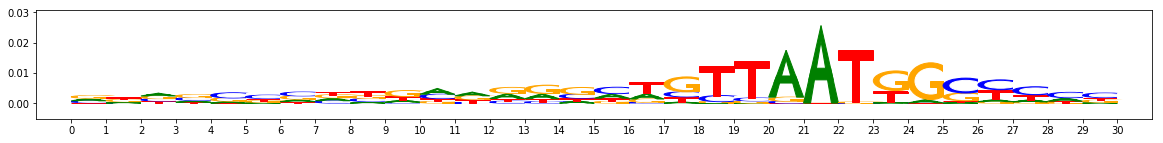

Hyp contrib scores


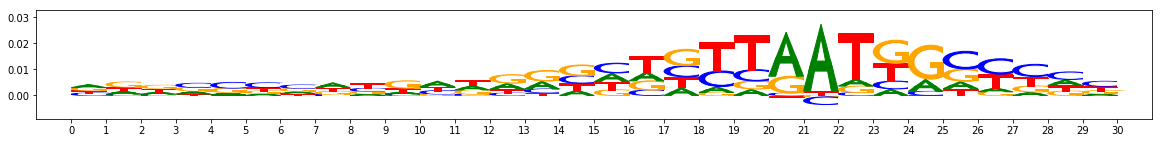

In [9]:
from modisco.aggregator import TrimToBestWindow

trimmer = TrimToBestWindow(window_size=30, track_names=["task0_contrib_scores"])

for i,pattern in enumerate(trimmer(tfmodisco_results
                                   .metacluster_idx_to_submetacluster_results[0]
                                   .seqlets_to_patterns_result.patterns)):
    print("num seqlets",len(pattern.seqlets))
    print("fwd")
    viz_sequence.plot_weights(viz_sequence.ic_scale(
        pattern["sequence"].fwd, background=np.array([0.25,0.25,0.25,0.25])))
    print("Contrib scores")
    viz_sequence.plot_weights(pattern["task0_contrib_scores"].fwd)
    print("Hyp contrib scores")
    viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"].fwd)
  
    print("rev")
    viz_sequence.plot_weights(viz_sequence.ic_scale(
      pattern["sequence"].rev, background=np.array([0.25,0.25,0.25,0.25])))
    print("Contrib scores")
    viz_sequence.plot_weights(pattern["task0_contrib_scores"].rev)
    print("Hyp contrib scores")
    viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"].rev)

In [47]:
#compare to Gandhi et al

!wget http://www.beerlab.org/gkmsvm/downloads/gkmsvm-2.0.tar.gz -O gkmsvm-2.0.tar.gz
!tar -xzf gkmsvm-2.0.tar.gz

--2019-02-10 00:08:11--  http://www.beerlab.org/gkmsvm/downloads/gkmsvm-2.0.tar.gz
Resolving www.beerlab.org... 23.229.186.73
Connecting to www.beerlab.org|23.229.186.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2936492 (2.8M) [application/x-gzip]
Saving to: 'gkmsvm-2.0.tar.gz'

100%[======================================>] 2,936,492   3.15MB/s   in 0.9s   

2019-02-10 00:08:12 (3.15 MB/s) - 'gkmsvm-2.0.tar.gz' saved [2936492/2936492]



In [48]:
!python gkmsvm/scripts/nrkmers.py 11 nrkmers.fa

In [58]:
!~/lsgkm/src/gkmpredict -v 1 nrkmers.fa lsgkm_defaultsettings_t2.model.txt nrkmers_scores.txt

In [59]:
!python gkmsvm/scripts/svmw_emalign.py nrkmers_scores.txt 21 gandhietalpwms

INFO  @ Sun, 10 Feb 2019 00:32:32: seed kmer: CTCCTGCTGTG 
INFO  @ Sun, 10 Feb 2019 00:32:33: round - 0/100 
INFO  @ Sun, 10 Feb 2019 00:32:39: obj: 16083.268696 
INFO  @ Sun, 10 Feb 2019 00:32:39: round - 1/100 
INFO  @ Sun, 10 Feb 2019 00:32:45: obj: 92992.125311 
INFO  @ Sun, 10 Feb 2019 00:32:45: round - 2/100 
INFO  @ Sun, 10 Feb 2019 00:32:51: obj: 56761.468484 
INFO  @ Sun, 10 Feb 2019 00:32:51: round - 3/100 
INFO  @ Sun, 10 Feb 2019 00:32:57: obj: 64843.338187 
INFO  @ Sun, 10 Feb 2019 00:32:57: round - 4/100 
INFO  @ Sun, 10 Feb 2019 00:33:03: obj: 62562.715117 
INFO  @ Sun, 10 Feb 2019 00:33:03: round - 5/100 
INFO  @ Sun, 10 Feb 2019 00:33:10: obj: 63198.430302 
INFO  @ Sun, 10 Feb 2019 00:33:10: round - 6/100 
INFO  @ Sun, 10 Feb 2019 00:33:16: obj: 63012.323616 
INFO  @ Sun, 10 Feb 2019 00:33:16: round - 7/100 
INFO  @ Sun, 10 Feb 2019 00:33:22: obj: 63042.489454 
INFO  @ Sun, 10 Feb 2019 00:33:22: round - 8/100 
INFO  @ Sun, 10 Feb 2019 00:33:28: obj: 63042.489454 
INFO 

In [60]:
!cat gandhietalpwms_models.meme

MEME version 4

ALPHABET= ACGT

strands: + -

Background letter frequencies (from entire human genome)
A 0.29 C 0.21 G 0.21 T 0.29

MOTIF GKM.1
letter-probability matrix: alength= 4 w= 21 nsites= 9210 E= 0
0.251 0.250 0.250 0.250
0.251 0.249 0.249 0.251
0.248 0.247 0.257 0.247
0.254 0.245 0.263 0.239
0.248 0.263 0.240 0.249
0.219 0.315 0.220 0.246
0.202 0.262 0.216 0.319
0.160 0.519 0.162 0.159
0.193 0.487 0.158 0.162
0.197 0.222 0.162 0.420
0.164 0.163 0.519 0.153
0.162 0.501 0.171 0.166
0.167 0.162 0.184 0.487
0.155 0.155 0.534 0.155
0.246 0.179 0.249 0.327
0.162 0.168 0.500 0.170
0.309 0.253 0.206 0.233
0.237 0.241 0.274 0.247
0.240 0.256 0.260 0.244
0.247 0.257 0.246 0.250
0.249 0.251 0.249 0.251

MOTIF GKM.19
letter-probability matrix: alength= 4 w= 21 nsites= 5563 E= 0
0.250 0.250 0.255 0.245
0.246 0.239 0.260 0.255
0.227 0.266 0.261 0.246
0.201 0.350 0.224 0.226
0.191 0.403 0.186 0.220
0.307 0.176 0.173 0.343
0.161 0.163 0.161 0.515
0.159 0.157 0.157 0.527
0.160 0.181 0.501 0.15

You are using pip version 18.0, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.0, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Number of motifs: 3


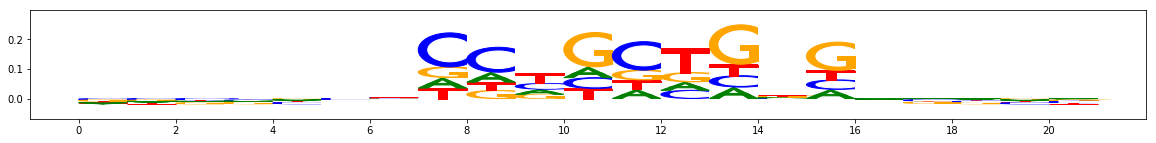

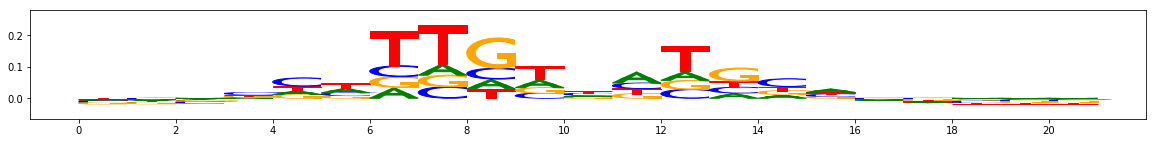

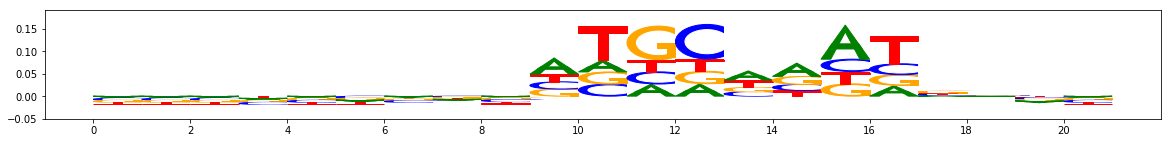

In [61]:
import numpy as np
from __future__ import division, print_function
!pip install vizsequence
!pip install biopython
from vizsequence import viz_sequence
from Bio import motifs
records = motifs.parse(open('gandhietalpwms_models.meme'), 'minimal')
print("Number of motifs:",len(records))

def get_freqs_mat(meme_record):
    counts_mat = np.array([meme_record.counts[x]
                        for x in ['A', 'C', 'G', 'T']])
    normalization = np.sum(counts_mat, axis=0)
    freqs_mat = counts_mat/normalization[None,:]
    return freqs_mat.T

for meme_record in records:
    freqs_mat = get_freqs_mat(meme_record)
    viz_sequence.plot_weights(viz_sequence.ic_scale(
      pwm=freqs_mat,
      background=np.array([
          meme_record.background[x] for x in ['A', 'C', 'G', 'T']])),
          subticks_frequency=2)

motif 1


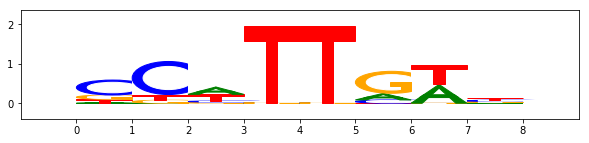

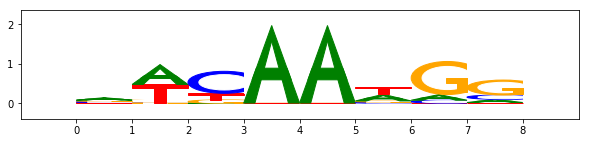

motif 2


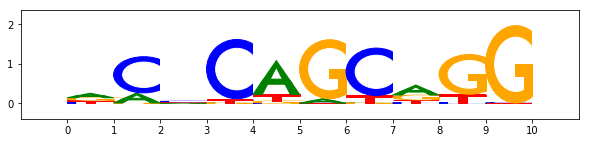

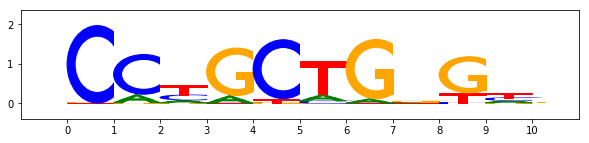

motif 3


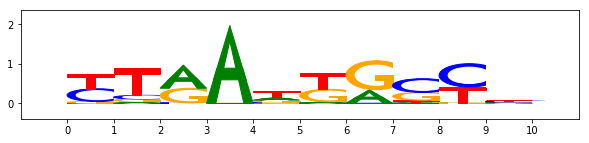

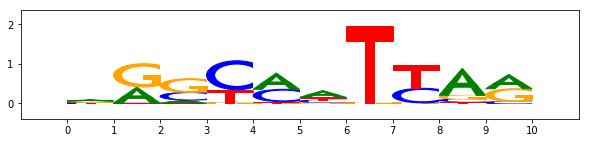

motif 4


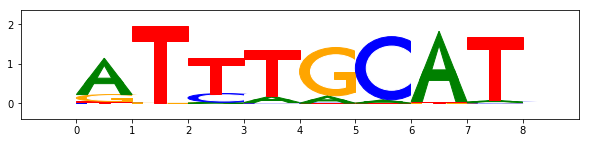

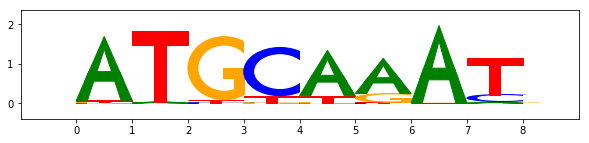

motif 5


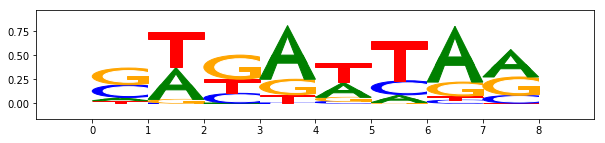

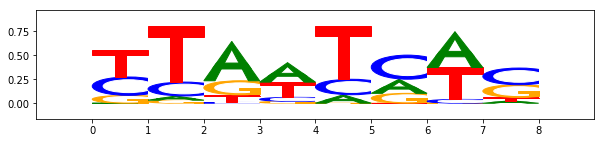

motif 6


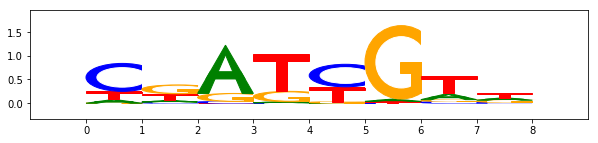

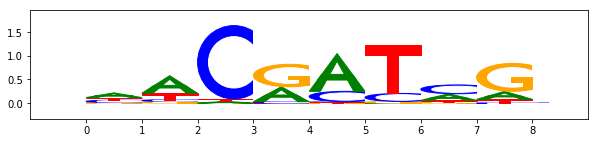

motif 7


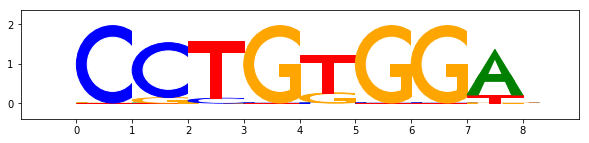

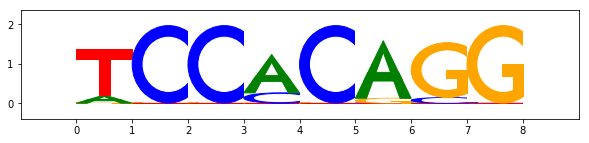

motif 8


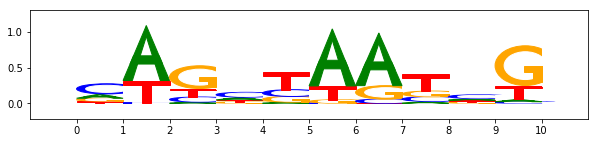

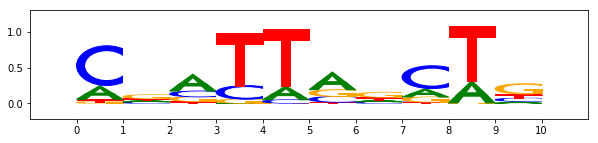

motif 9


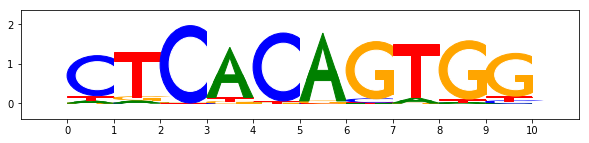

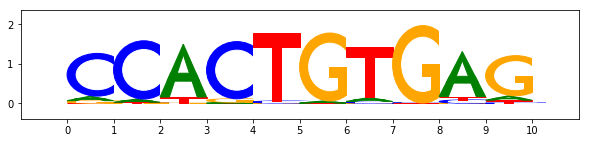

motif 10


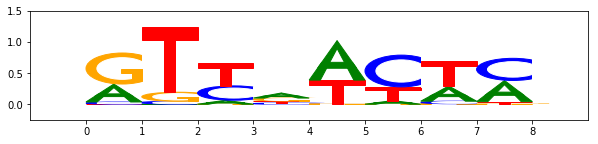

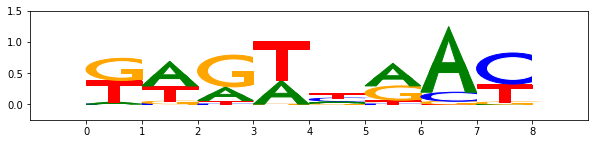

In [16]:
import glob

#HOMER motifs
num_homer_motifs = 10
homer_path = "motifResults"

for i in range(num_homer_motifs):
    print("motif",i+1)
    motif_file = homer_path+"/homerResults/motif"+str(i+1)+".motif"
    pwm_rows = []
    for i,line in enumerate(open(motif_file)):
        if (i > 0):
            pwm_rows.append([float(x) for x in line.rstrip().split("\t")])
    pwm_rows = np.array(pwm_rows)
    viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pwm_rows),
                                                    background=np.array([0.25, 0.25, 0.25, 0.25])),
                              figsize=(10,2))
    viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pwm_rows[::-1,::-1]),
                                                    background=np.array([0.25, 0.25, 0.25, 0.25])),
                              figsize=(10,2))